# Here I import all the necessary modules

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# Load the dataset
df = pd.read_csv('student_data_1000.csv')

# Display the first few rows of the dataframe
df.head(10)


,Previous Exam Score,Attendance Percentage,Study Hours per Week,Age,Gender,Parental Education Level,Stress Level,Pass or Fail
0,81.388165,85.648000,5.520619,23,Male,Doctorate,3.833246,Pass
1,78.758294,50.574624,3.241544,22,Female,Associate Degree,5.369479,Pass
2,93.167890,70.438863,33.188915,24,Female,High School,5.301996,Pass
3,84.177906,96.201344,39.071775,21,Female,Master's Degree,5.242298,Pass
4,80.298490,55.594031,16.189003,24,Male,Bachelor's Degree,2.582054,Pass
5,36.801590,75.821219,3.505993,22,Non-binary,High School,2.304393,Fail
6,87.953424,89.326119,2.632470,19,Non-binary,High School,3.292908,Pass
7,71.246208,97.126565,35.652728,18,Non-binary,Associate Degree,9.230735,Pass
8,74.687375,87.338832,18.552570,21,Male,Master's Degree,2.017477,Pass
9,74.789998,86.028277,12.801093,21,Female,Bachelor's Degree,7.816826,Pass


#Checking for Missing values and dropping unecessary feature such as  `'Gender', 'Parental Education Level'` and then I hot encoded the non int or float values.

In [15]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical variables using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_features = ohe.fit_transform(df[['Gender', 'Parental Education Level']]).toarray()
feature_names = ohe.get_feature_names_out(['Gender', 'Parental Education Level'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

df = df.drop(['Gender', 'Parental Education Level'], axis=1)


# Encode 'Pass or Fail' column
df['Pass or Fail'] = df['Pass or Fail'].apply(lambda x: 1 if x == 'Pass' else 0)

df.head(10)

Previous Exam Score         0
Attendance Percentage       0
Study Hours per Week        0
Age                         0
Gender                      0
Parental Education Level    0
Stress Level                0
Pass or Fail                0
dtype: int64


,Previous Exam Score,Attendance Percentage,Study Hours per Week,Age,Stress Level,Pass or Fail
0,81.388165,85.648000,5.520619,23,3.833246,1
1,78.758294,50.574624,3.241544,22,5.369479,1
2,93.167890,70.438863,33.188915,24,5.301996,1
3,84.177906,96.201344,39.071775,21,5.242298,1
4,80.298490,55.594031,16.189003,24,2.582054,1
5,36.801590,75.821219,3.505993,22,2.304393,0
6,87.953424,89.326119,2.632470,19,3.292908,1
7,71.246208,97.126565,35.652728,18,9.230735,1
8,74.687375,87.338832,18.552570,21,2.017477,1
9,74.789998,86.028277,12.801093,21,7.816826,1


## Check the output distribution

In [16]:
df['Pass or Fail'].value_counts()

Pass or Fail
1    753
0    421
Name: count, dtype: int64

# Shufle the data so we can have a really mixed distribution

In [17]:
df_shuffled = df.sample(frac=1, random_state=42)

In [18]:
df_shuffled.head(10)

,Previous Exam Score,Attendance Percentage,Study Hours per Week,Age,Stress Level,Pass or Fail
410,68.285681,82.802751,32.150209,20,8.651548,1
430,50.979467,87.080131,0.272588,19,8.565433,1
675,49.000000,77.200000,3.300000,15,8.800000,0
208,76.710390,99.165283,10.824800,20,1.720806,1
811,89.499611,74.629950,14.007947,20,8.441264,1
665,31.000000,56.300000,9.700000,17,9.100000,0
1066,37.000000,71.300000,4.500000,18,6.800000,0
832,88.292554,65.394319,21.892987,18,4.637336,1
58,75.342503,56.074770,2.985537,19,8.015976,1
1107,34.000000,70.300000,3.200000,17,7.900000,0


In [ ]:
## Splitting the data into train and test samples and Normalize it

In [19]:
# Features and target
X = df_shuffled.drop('Pass or Fail', axis=1)
y = df_shuffled['Pass or Fail']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)



print(X_train.shape)
print(X_test.shape)

print(y_test)
print(y_train)

(939, 5)
(235, 5)
481    1
221    1
843    1
309    1
175    1
      ..
101    1
454    1
178    1
330    1
617    1
Name: Pass or Fail, Length: 235, dtype: int64
546     1
427     1
193     1
903     0
61      1
       ..
556     1
14      1
776     1
191     1
1157    0
Name: Pass or Fail, Length: 939, dtype: int64


# Building a simple model without optimization technique

In [20]:
# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Testing the model on the initial data,Non normalized data.

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1.2294 - accuracy: 0.6848 - val_loss: 0.1741 - val_accuracy: 0.9532
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.9297 - val_loss: 0.1218 - val_accuracy: 0.9702
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9404 - val_loss: 0.1033 - val_accuracy: 0.9532
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9436 - val_loss: 0.0988 - val_accuracy: 0.9617
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.1339 - accuracy: 0.9499 - val_loss: 0.0916 - val_accuracy: 0.9745
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9489 - val_loss: 0.0912 - val_accuracy: 0.9660
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9521 - val_loss: 0.0879 - val_accuracy: 0.9787
Epoch 8/50
30/30 [=

## Evaluating

In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the results
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))



8/8 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9702
Test Accuracy: 0.9702
8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        84
           1       0.97      0.99      0.98       151

    accuracy                           0.97       235
   macro avg       0.97      0.96      0.97       235
weighted avg       0.97      0.97      0.97       235

[[ 79   5]
 [  2 149]]
[[ 79   5]
 [  2 149]]


## Applying Error Analysis techniques and plotting the confusion Matrix

8/8 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9702
Test Accuracy: 0.9702
8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        84
           1       0.97      0.99      0.98       151

    accuracy                           0.97       235
   macro avg       0.97      0.96      0.97       235
weighted avg       0.97      0.97      0.97       235



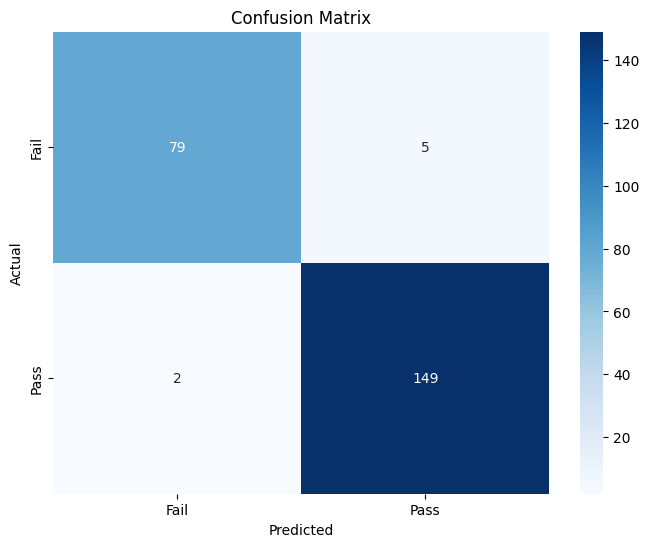

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the results
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Testing the simple model with the scaled data

In [24]:
# Train the model
history_1 = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test), batch_size=32)

Epoch 1/50
30/30 [==============================] - 1s 9ms/step - loss: 0.6596 - accuracy: 0.5751 - val_loss: 0.4330 - val_accuracy: 0.8766
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.3331 - accuracy: 0.9255 - val_loss: 0.2429 - val_accuracy: 0.9234
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9297 - val_loss: 0.1683 - val_accuracy: 0.9447
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9478 - val_loss: 0.1326 - val_accuracy: 0.9489
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9531 - val_loss: 0.1062 - val_accuracy: 0.9702
Epoch 6/50
30/30 [==============================] - 0s 6ms/step - loss: 0.1140 - accuracy: 0.9574 - val_loss: 0.0866 - val_accuracy: 0.9745
Epoch 7/50
30/30 [==============================] - 0s 5ms/step - loss: 0.1016 - accuracy: 0.9691 - val_loss: 0.0817 - val_accuracy: 0.9702
Epoch 8/50
30/30 [==

## Plot the training history

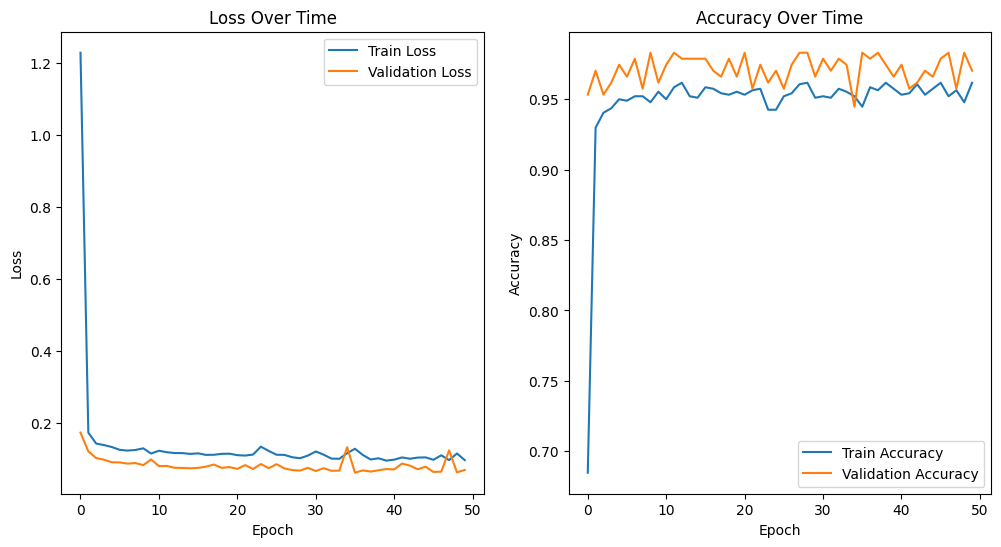

In [32]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the results
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

8/8 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9957
Test Accuracy: 0.9957
8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       1.00      0.99      1.00       151

    accuracy                           1.00       235
   macro avg       0.99      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

[[ 84   0]
 [  1 150]]
[[ 84   0]
 [  1 150]]


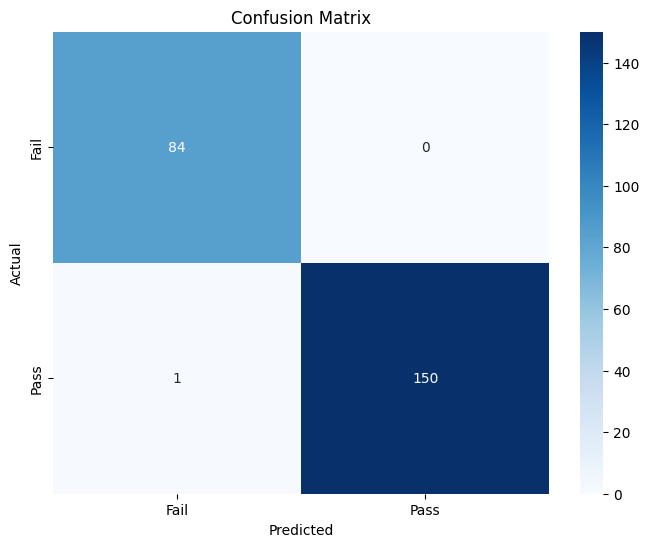

In [26]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving the simple model

In [38]:
MODEL_OPT_FILE = 'model.keras'
model.save(MODEL_OPT_FILE)

## An optimized model (model_optimized) is built with additional techniques for improving generalization and convergence.
##Dropout layers (with 50% dropout rate) are added after each dense layer to prevent overfitting.
##The model is compiled similarly to the simple model but with additional callbacks (EarlyStopping, LearningRateScheduler, ModelCheckpoint) for optimization.
##Training (fit) includes these callbacks to dynamically adjust learning rates, stop early if validation loss doesn't improve, and save the best model weights.

In [29]:
# 1. Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 2. Learning Rate Scheduler
def lr_scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# 3. ModelCheckpoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Build the model with all optimizations
model_optimized = Sequential()
model_optimized.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_optimized.add(Dropout(0.5))
model_optimized.add(Dense(32, activation='relu'))
model_optimized.add(Dropout(0.5))
model_optimized.add(Dense(1, activation='sigmoid'))

# Compile the model
model_optimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all callbacks
history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    callbacks=[early_stopping, lr_callback, model_checkpoint_callback]
)


Epoch 1/100
30/30 [==============================] - 3s 17ms/step - loss: 0.6022 - accuracy: 0.6688 - val_loss: 0.5277 - val_accuracy: 0.6638 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5228 - accuracy: 0.7252 - val_loss: 0.4356 - val_accuracy: 0.8638 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.8168 - val_loss: 0.3415 - val_accuracy: 0.9106 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 0.3722 - accuracy: 0.8669 - val_loss: 0.2741 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 5/100
30/30 [==============================] - 0s 13ms/step - loss: 0.3183 - accuracy: 0.8935 - val_loss: 0.2248 - val_accuracy: 0.9362 - lr: 0.0010
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 0.2849 - accuracy: 0.8978 - val_loss: 0.1933 - val_accuracy: 0.9362 - lr: 0.0010
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0

#Plot training history

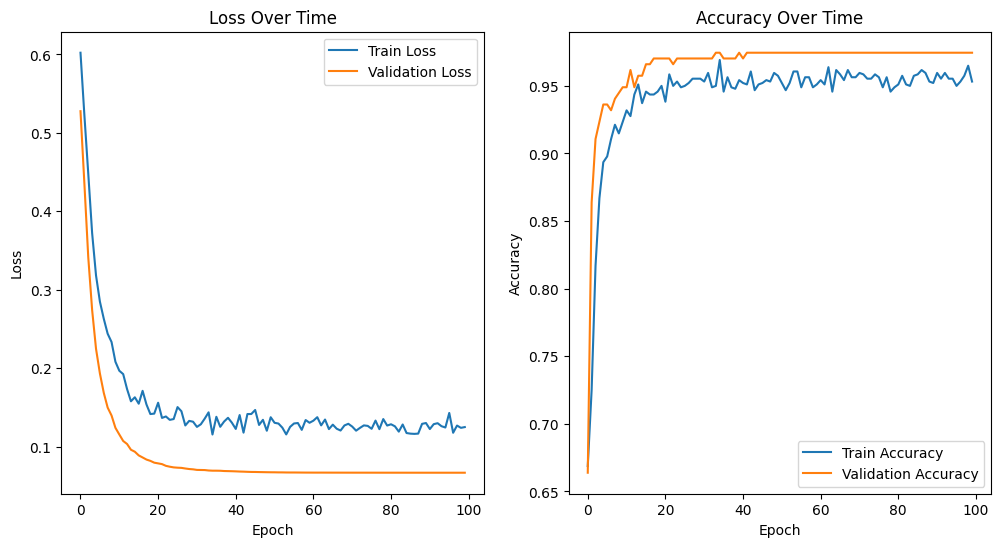

In [33]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_optimized.history['loss'], label='Train Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

# Applying Error Analysis Techniques and the plotting the confusion matrix

In [30]:
# Evaluate the model
loss, accuracy = model_optimized.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict the results
y_pred = (model_optimized.predict(X_test_scaled) > 0.5).astype('int32')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

8/8 [==============================] - 0s 9ms/step - loss: 0.0667 - accuracy: 0.9745
Test Accuracy: 0.9745
8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        84
           1       0.97      0.99      0.98       151

    accuracy                           0.97       235
   macro avg       0.97      0.97      0.97       235
weighted avg       0.97      0.97      0.97       235

[[ 80   4]
 [  2 149]]
[[ 80   4]
 [  2 149]]


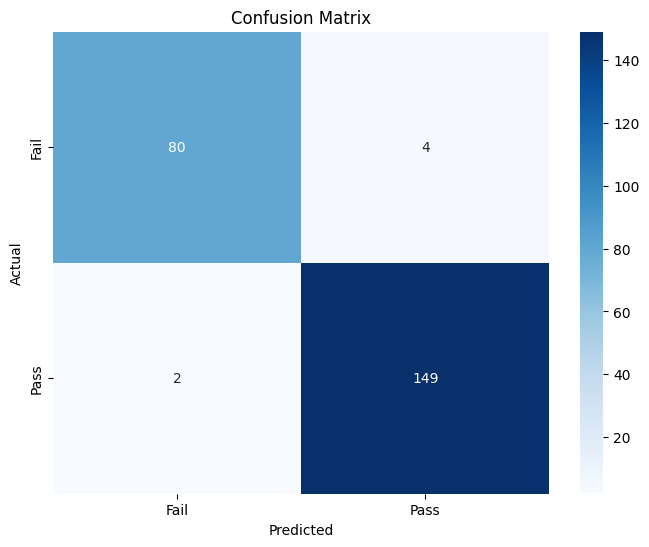

In [31]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the opitmized model

In [35]:
MODEL_OPT_FILE = 'model_optimized.keras'
model_optimized.save(MODEL_OPT_FILE)